In [2]:
#Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#Create a set of random lat and long combinations
lats= np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs= np.random.uniform(low=-180.000, high=180.000, size= 1500)
lat_lngs= zip(lats, lngs)
lat_lngs

In [4]:
#Add the latitudes and longitudes to a list
coordinates= list(lat_lngs)

In [5]:
#Import citipy module
from citipy import citipy

In [6]:
#Create a list for holding the cities
cities= []
#Identify the nearest city for each lat and long combo
for coordinate in coordinates:
    city=citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    #If the city is unique, add it to cities list
    if city not in cities:
        cities.append(city)
#Print the city count to confirm sufficient count
len(cities)

610

In [7]:
#Import the requests library
import requests
#Import the API key
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
#Import the datetime module from the datetime library
from datetime import datetime

In [10]:
#Create an empty list to hold the weather data
city_data=[]
#Print the beginning of the logging
print("Beginning Data Retrieval    ")
print("----------------------------")

#Create counters
record_count= 1
set_count= 1

#Loop through all the cities in list
for i, city in enumerate(cities):
    #Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count+= 1
        record_count= 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    #Log the URL, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    #Add 1 to the record count
    record_count += 1
    #Run an API request for each of the cities
    try:
        #Parse the JSON and retrieve data
        city_weather= requests.get(city_url).json()
        #Parse out the needed data
        city_lat= city_weather["coord"]["lat"]
        city_lng= city_weather["coord"]["lon"]
        city_max_temp= city_weather["main"]["temp_max"]
        city_humidity= city_weather["main"]["humidity"]
        city_clouds= city_weather["clouds"]["all"]
        city_wind= city_weather["wind"]["speed"]
        city_country= city_weather["sys"]["country"]
        #Convert the date to ISO standard
        city_date= datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        #Append the city information into city_data list
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    #If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
#Indidate that Data Loading is complete
print("----------------------------")
print("Data Retrieval Complete     ")
print("----------------------------")

Beginning Data Retrieval    
----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | broken hill
Processing Record 3 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 4 of Set 1 | luganville
Processing Record 5 of Set 1 | fairbanks
Processing Record 6 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 7 of Set 1 | mataura
Processing Record 8 of Set 1 | grindavik
Processing Record 9 of Set 1 | sayat
Processing Record 10 of Set 1 | ponta do sol
Processing Record 11 of Set 1 | thompson
Processing Record 12 of Set 1 | bredasdorp
Processing Record 13 of Set 1 | egvekinot
Processing Record 14 of Set 1 | kulhudhuffushi
Processing Record 15 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 16 of Set 1 | copiapo
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | road town
Processing Record 19 of Set 1 | palmares do sul
Processing Record 20 of Set 1 | esperance
Processing R

Processing Record 36 of Set 4 | dikson
Processing Record 37 of Set 4 | bajo baudo
City not found. Skipping...
Processing Record 38 of Set 4 | mahibadhoo
Processing Record 39 of Set 4 | pozo colorado
Processing Record 40 of Set 4 | meulaboh
Processing Record 41 of Set 4 | pangody
Processing Record 42 of Set 4 | hofn
Processing Record 43 of Set 4 | faanui
Processing Record 44 of Set 4 | lebu
Processing Record 45 of Set 4 | selikhino
Processing Record 46 of Set 4 | semey
Processing Record 47 of Set 4 | ancud
Processing Record 48 of Set 4 | bengkulu
Processing Record 49 of Set 4 | smithers
Processing Record 50 of Set 4 | kavieng
Processing Record 1 of Set 5 | lesozavodsk
Processing Record 2 of Set 5 | saint-philippe
Processing Record 3 of Set 5 | batagay-alyta
Processing Record 4 of Set 5 | ingham
Processing Record 5 of Set 5 | sirajganj
Processing Record 6 of Set 5 | altos
Processing Record 7 of Set 5 | cockburn town
Processing Record 8 of Set 5 | ouro preto do oeste
Processing Record 9 o

Processing Record 25 of Set 8 | medicine hat
Processing Record 26 of Set 8 | coulihaut
City not found. Skipping...
Processing Record 27 of Set 8 | geraldton
Processing Record 28 of Set 8 | valkeala
Processing Record 29 of Set 8 | oranjemund
Processing Record 30 of Set 8 | rudarpur
Processing Record 31 of Set 8 | rawson
Processing Record 32 of Set 8 | sobolevo
Processing Record 33 of Set 8 | kyzyl-suu
Processing Record 34 of Set 8 | indramayu
Processing Record 35 of Set 8 | alyangula
Processing Record 36 of Set 8 | siena
Processing Record 37 of Set 8 | quelimane
Processing Record 38 of Set 8 | muhoroni
Processing Record 39 of Set 8 | rocha
Processing Record 40 of Set 8 | miri
Processing Record 41 of Set 8 | movila miresei
Processing Record 42 of Set 8 | turukhansk
Processing Record 43 of Set 8 | ust-maya
Processing Record 44 of Set 8 | oistins
Processing Record 45 of Set 8 | sola
Processing Record 46 of Set 8 | samtredia
Processing Record 47 of Set 8 | nguiu
City not found. Skipping...


Processing Record 12 of Set 12 | qazax
Processing Record 13 of Set 12 | ko samui
Processing Record 14 of Set 12 | necochea
Processing Record 15 of Set 12 | dukhovshchina
Processing Record 16 of Set 12 | monrovia
Processing Record 17 of Set 12 | jalu
Processing Record 18 of Set 12 | sharjah
Processing Record 19 of Set 12 | soyo
Processing Record 20 of Set 12 | kushmurun
Processing Record 21 of Set 12 | akureyri
Processing Record 22 of Set 12 | solnechnyy
Processing Record 23 of Set 12 | mount gambier
Processing Record 24 of Set 12 | griffith
Processing Record 25 of Set 12 | dzilam gonzalez
Processing Record 26 of Set 12 | evreux
Processing Record 27 of Set 12 | kokino
Processing Record 28 of Set 12 | grass valley
Processing Record 29 of Set 12 | saldanha
Processing Record 30 of Set 12 | lata
Processing Record 31 of Set 12 | atwater
Processing Record 32 of Set 12 | kainantu
Processing Record 33 of Set 12 | mayahi
Processing Record 34 of Set 12 | eidfjord
Processing Record 35 of Set 12 | 

In [11]:
#Convert the array of dictionaries to a Pandas DataFrame
city_data_df= pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8000,-68.3000,33.42,86,40,4.61,AR,2021-05-31 17:41:34
1,Broken Hill,-31.9500,141.4333,51.51,50,100,11.50,AU,2021-05-31 17:44:41
2,Luganville,-15.5333,167.1667,73.94,85,100,5.03,VU,2021-05-31 17:44:42
3,Fairbanks,64.8378,-147.7164,62.22,56,90,4.61,US,2021-05-31 17:40:04
4,Mataura,-46.1927,168.8643,40.17,97,87,1.77,NZ,2021-05-31 17:44:42
5,Grindavik,63.8424,-22.4338,48.67,76,75,20.87,IS,2021-05-31 17:44:43
6,Sayat,38.7839,63.8803,93.07,14,77,9.31,TM,2021-05-31 17:44:43
7,Ponta Do Sol,32.6667,-17.1000,72.01,75,60,1.74,PT,2021-05-31 17:44:43
8,Thompson,55.7435,-97.8558,59.16,58,90,9.22,CA,2021-05-31 17:44:43
9,Bredasdorp,-34.5322,20.0403,56.52,77,19,7.52,ZA,2021-05-31 17:44:44


In [12]:
new_column_order= ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df= city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ushuaia,AR,2021-05-31 17:41:34,-54.8000,-68.3000,33.42,86,40,4.61
1,Broken Hill,AU,2021-05-31 17:44:41,-31.9500,141.4333,51.51,50,100,11.50
2,Luganville,VU,2021-05-31 17:44:42,-15.5333,167.1667,73.94,85,100,5.03
3,Fairbanks,US,2021-05-31 17:40:04,64.8378,-147.7164,62.22,56,90,4.61
4,Mataura,NZ,2021-05-31 17:44:42,-46.1927,168.8643,40.17,97,87,1.77
5,Grindavik,IS,2021-05-31 17:44:43,63.8424,-22.4338,48.67,76,75,20.87
6,Sayat,TM,2021-05-31 17:44:43,38.7839,63.8803,93.07,14,77,9.31
7,Ponta Do Sol,PT,2021-05-31 17:44:43,32.6667,-17.1000,72.01,75,60,1.74
8,Thompson,CA,2021-05-31 17:44:43,55.7435,-97.8558,59.16,58,90,9.22
9,Bredasdorp,ZA,2021-05-31 17:44:44,-34.5322,20.0403,56.52,77,19,7.52


In [16]:
#Create the output file (CSV)
output_data_file= "weather_data/cities.csv"
#Export the City_Data into a CSV
city_data_df.to_csv(output_data_file, index_label= "City_ID")

In [18]:
#Extract relevant fields from the DataFrame for plotting
lats= city_data_df["Lat"]
max_temps= city_data_df["Max Temp"]
humidity= city_data_df["Humidity"]
cloudiness= city_data_df["Cloudiness"]
wind_speed= city_data_df["Wind Speed"]

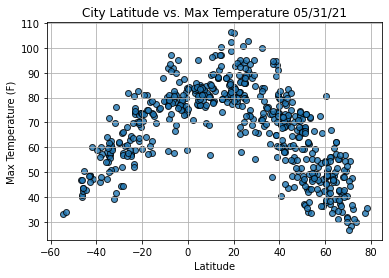

In [19]:
#Import time module
import time

#Build the scatter plot for latitude vs max temp
plt.scatter(lats, max_temps, edgecolor= "black",
           linewidths= 1, marker= "o", alpha= 0.8, label= "Cities")
#Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig1.png")

#Show plot
plt.show()

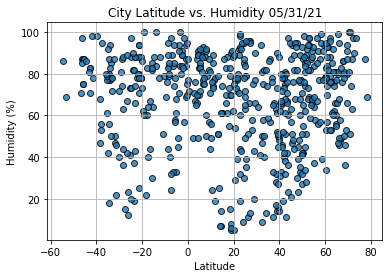

In [20]:
#Build the scatter plot for latitude vs humidity
plt.scatter(lats, humidity, edgecolor= "black",
           linewidths= 1, marker= "o", alpha= 0.8, label= "Cities")
#Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig2.png")

#Show plot
plt.show()

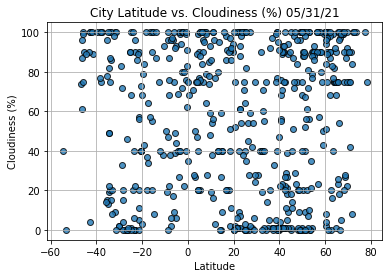

In [21]:
#Build the scatter plot for latitude vs cloudiness
plt.scatter(lats, cloudiness, edgecolor= "black",
           linewidths= 1, marker= "o", alpha= 0.8, label= "Cities")
#Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig3.png")

#Show plot
plt.show()

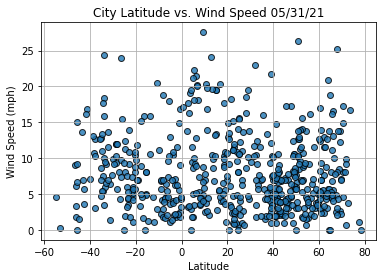

In [22]:
#Build the scatter plot for latitude vs wind speed
plt.scatter(lats, wind_speed, edgecolor= "black",
           linewidths= 1, marker= "o", alpha= 0.8, label= "Cities")
#Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig4.png")

#Show plot
plt.show()